A k-means cluster analysis was conducted to identify underlying subgroups of suicide rates. All clustering variables were standardized to have a mean of 0 and a standard deviation of 1.

Data were randomly split into a training set that included 70% of the observations and a test set that included 30% of the observations. A series of k-means cluster analyses were conducted on the training data specifying k=1-9 clusters, using Euclidean distance. The variance in the clustering variables that was accounted for by the clusters (r-square) was plotted for each of the nine cluster solutions in an elbow curve to provide guidance for choosing the number of clusters to interpret.
The elbow curve suggested that a 3-cluster solutions might be interpreted. The results below are for an interpretation of the 3-cluster solution.

Canonical discriminant analyses was used to reduce the clustering variable down a few variables that accounted for most of the variance in the clustering variables. A scatterplot of the first two canonical variables by cluster indicated that the observations in clusters 1 and 3 were densely packed with relatively low within cluster variance, and did not overlap very much with each ither. Cluster 2 was generally distinct, but the observations had greater spread suggesting higher within cluster variance. 



In [88]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os

import matplotlib.pylab as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv("D:/Data/CourseraClass/gapminder.csv") 

In [90]:
# Data Management
data['suicideper100th'] = data['suicideper100th'].replace(r'\s+', np.nan, regex=True)
data['internetuserate'] = data['internetuserate'].replace(r'\s+', np.nan, regex=True)
data['incomeperperson']= data['incomeperperson'].replace(r'\s+', np.nan, regex=True)
data['employrate']= data['employrate'].replace(r'\s+', np.nan, regex=True)
data['urbanrate']= data['urbanrate'].replace(r'\s+', np.nan, regex=True)
data['alcconsumption']= data['alcconsumption'].replace(r'\s+', np.nan, regex=True)
data_clean = data.dropna(subset = ['suicideper100th', 'internetuserate', 'incomeperperson', 'employrate', 'urbanrate','alcconsumption'])

# subset clustering variables
cluster=data_clean[['suicideper100th','internetuserate','incomeperperson','employrate','urbanrate','alcconsumption']]
cluster.head()


,suicideper100th,internetuserate,incomeperperson,employrate,urbanrate,alcconsumption
1,7.69932985305786,44.9899469578783,1914.99655094922,51.4000015258789,46.72,7.29
2,4.8487696647644,12.5000733055148,2231.99333515006,50.5,65.22,.69
4,14.5546770095825,9.99995388324075,1381.00426770244,75.6999969482422,56.7,5.57
6,7.765584,36.0003349500148,10749.4192379463,58.4000015258789,92,9.35
7,3.74158787727356,44.0010245795602,1326.74175718861,40.0999984741211,63.86,13.66


In [91]:
# standardize clustering variables to have mean=0 and sd=1
clustervar=cluster.copy()
clustervar['incomeperperson']=preprocessing.scale(clustervar['incomeperperson'].astype('float64'))
clustervar['alcconsumption']=preprocessing.scale(clustervar['alcconsumption'].astype('float64'))
clustervar['urbanrate']=preprocessing.scale(clustervar['urbanrate'].astype('float64'))
clustervar['employrate']=preprocessing.scale(clustervar['employrate'].astype('float64'))
clustervar['internetuserate']=preprocessing.scale(clustervar['internetuserate'].astype('float64'))
clustervar['suicideper100th']=preprocessing.scale(clustervar['suicideper100th'].astype('float64'))

In [92]:
clustervar.describe()

,suicideper100th,internetuserate,incomeperperson,employrate,urbanrate,alcconsumption
count,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,-2.546574e-16,-1.207368e-16,-1.665335e-17,-8.187895e-17,6.106227e-17,-1.304512e-16
std,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.529914e+00,-1.209532e+00,-6.882449e-01,-2.340318e+00,-2.023808e+00,-1.355663e+00
25%,-6.583824e-01,-8.781754e-01,-6.400026e-01,-6.951501e-01,-8.506727e-01,-8.166860e-01
50%,-1.528109e-01,-1.831951e-01,-4.643336e-01,-2.596995e-02,1.192491e-01,-1.445906e-01
75%,4.658426e-01,6.884989e-01,1.373086e-01,5.683199e-01,7.743678e-01,6.340992e-01
max,4.070540e+00,2.208345e+00,4.285616e+00,2.327031e+00,1.951718e+00,3.240408e+00


In [93]:
# split data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

In [94]:
data_clean.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7
6,Argentina,10749.4192379463,9.35,.560987,73.9,5872119000,45.9000015258789,.5,36.0003349500148,75.901,.635943800978195,8,768.428299701347,7.765584,58.4000015258789,92
7,Armenia,1326.74175718861,13.66,2.6184384,51.6,51219666.6666667,34.2000007629394,.1,44.0010245795602,74.241,,5,603.763057563433,3.74158787727356,40.0999984741211,63.86


In [95]:
# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

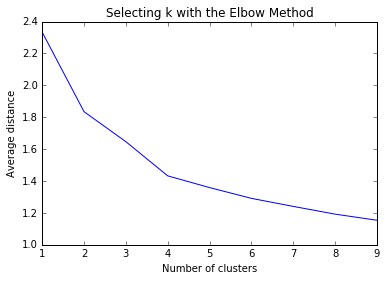

In [96]:
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [97]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

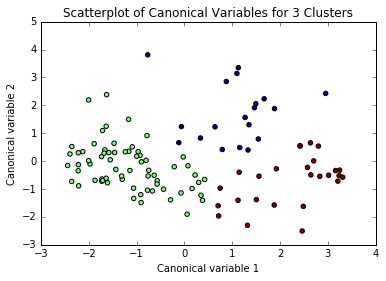

In [98]:
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

In [99]:
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)

# create a list that has the new index variable
cluslist=list(clus_train['index'])

# create a list of cluster assignments
labels=list(model3.labels_)

# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist

# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus

# rename the cluster assignment column
newclus.columns = ['cluster']

# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)

# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)

# cluster frequencies
merged_train.cluster.value_counts()

1    67
2    26
0    19
Name: cluster, dtype: int64

In [100]:
data_clean['lifeexpectancy']

1      76.918
2      73.131
4      51.093
6      75.901
7      74.241
9      81.907
10     80.854
11     70.739
12      75.62
13     75.057
14     68.944
15     76.835
16     70.349
17     80.009
18     76.072
19     56.081
21     67.185
22     66.618
23      75.67
24     53.183
25     73.488
26     78.005
27     73.371
28     55.439
29     50.411
30     63.125
31      51.61
32     81.012
33     74.156
35     48.398
        ...  
176    67.852
178    52.797
179    81.404
180    74.941
182    70.563
183    48.718
184    81.439
185    82.338
186     75.85
188    67.529
189    58.199
190    74.126
191    62.475
192    57.062
194    70.124
195    74.515
196    73.979
197    64.986
199    54.116
200    68.494
201    76.546
202     80.17
203    78.531
204    77.005
205    68.287
207    74.402
208    75.181
210    65.493
211    49.025
212    51.384
Name: lifeexpectancy, dtype: object

In [119]:


# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)


# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
gpa_data=data_clean['lifeexpectancy']

# split GPA data into train and test sets
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=123)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['lifeexpectancy', 'cluster']].dropna()


Clustering variable means by cluster
              index  suicideper100th  internetuserate  incomeperperson  \
cluster                                                                  
0        113.789474         1.104782         0.646370        -0.159933   
1        101.432836        -0.164724        -0.636369        -0.517051   
2        106.923077        -0.310800         1.362183         1.624841   

         employrate  urbanrate  alcconsumption  
cluster                                         
0         -0.702652   0.224522        1.514142  
1          0.179338  -0.459279       -0.624419  
2          0.059513   1.157261        0.216653  
